In [ ]:
# 5.2 Pandas数据结构

Pandas中一共有三种数据结构，分别为：Series、DataFrame和MultiIndex（老版本中叫Panel ）。

其中**Series**是**一维**数据结构，**DataFrame**是**二维**的表格型数据结构，**MultiIndex**是三维的数据结构。

# Series
Series是一个类似于一维数组的数据结构，它能够保存任何类型的数据，比如整数、字符串、浮点数等，主要由**一组数据**和与之相关的**索引**两部分构成。
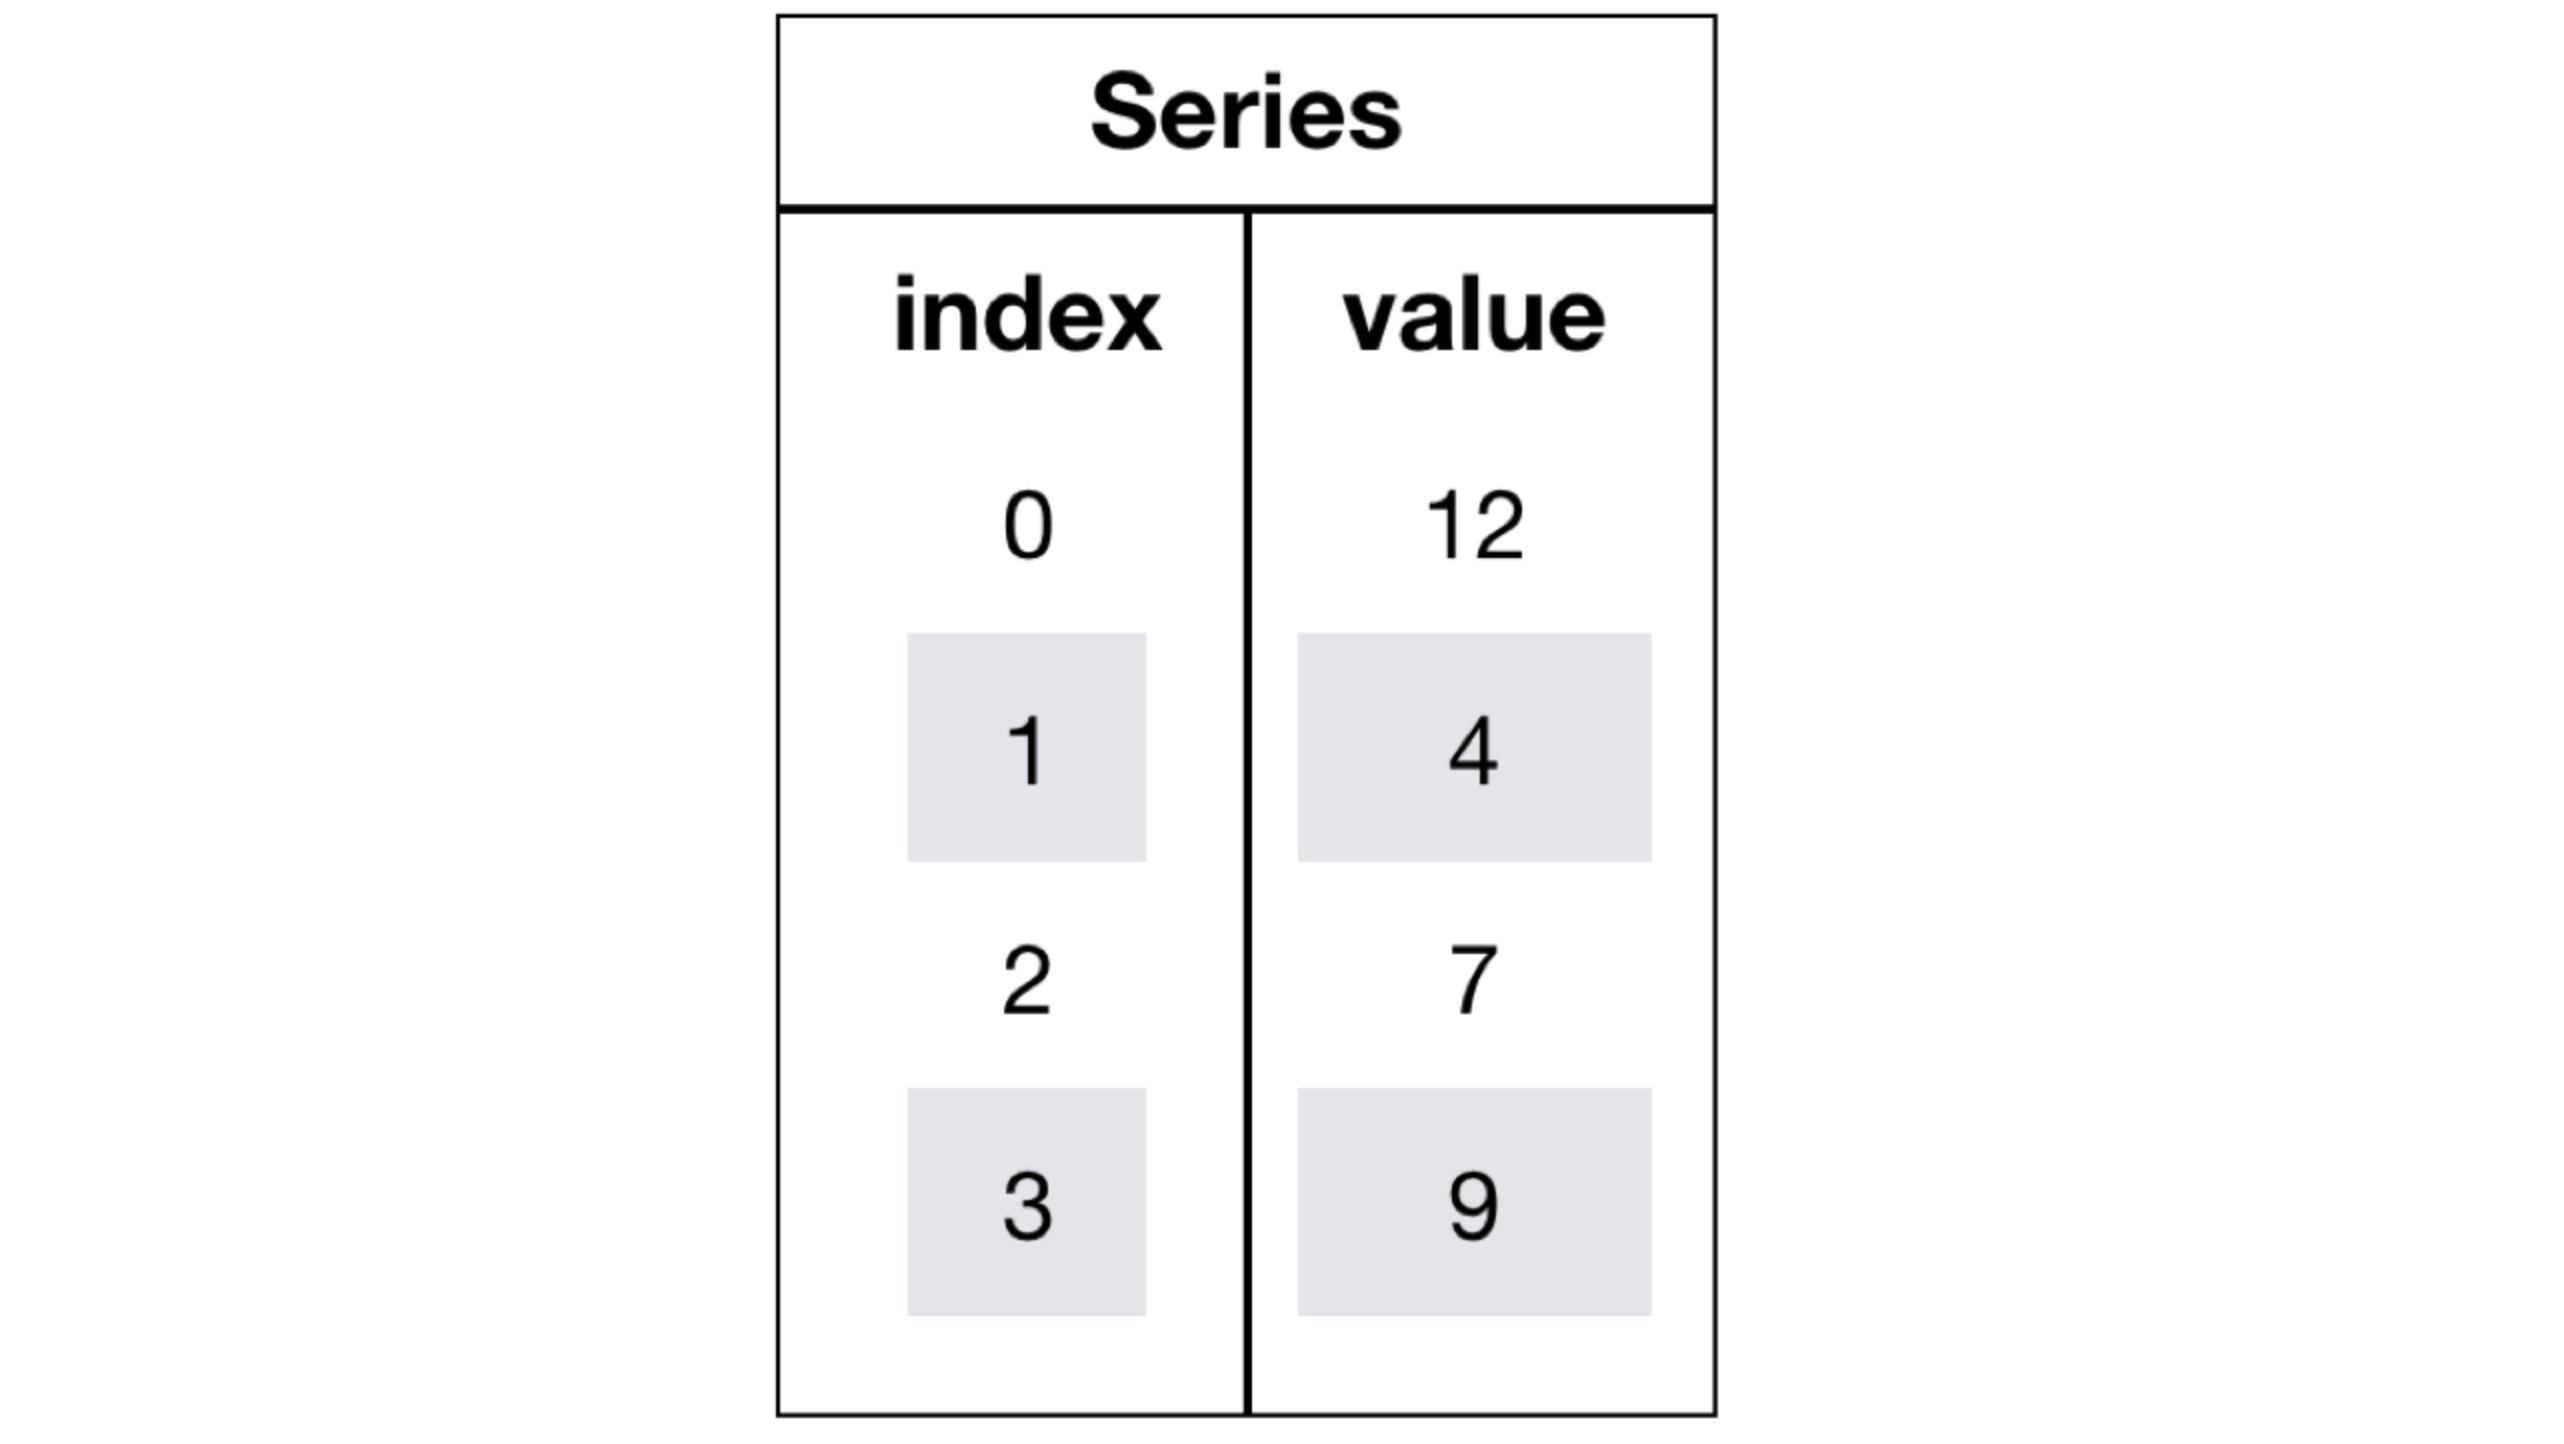

## Series的创建

In [ ]:
# 导入pandas
import pandas as pd

pd.Series(data=None, index=None, dtype=None)

- 参数：
    - data：传入的数据，可以是ndarray、list等
    - index：索引，必须是唯一的，且与数据的长度相等。如果没有传入索引参数，则默认会自动创建一个从0-N的整数索引。
    - dtype：数据的类型

通过已有数据创建

- 指定内容，默认索引

In [3]:
import numpy as np
import pandas as pd

pd.Series(np.arange(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

   - 指定索引

In [4]:
pd.Series([6.7,5.6,3,10,2],index=[1,2,3,4,5])

1     6.7
2     5.6
3     3.0
4    10.0
5     2.0
dtype: float64

   - 通过字典数据创建

In [5]:
color_count = pd.Series({'red':100,'blue':200,'green':500,'yellow':1000})
color_count

blue       200
green      500
red        100
yellow    1000
dtype: int64

## Series的属性

为了更方便地操作Series对象中的索引和数据，**Series**中提供了**两个属性index和values**

- index


In [6]:
color_count.index

Index(['blue', 'green', 'red', 'yellow'], dtype='object')

- values

In [7]:
color_count.values

array([ 200,  500,  100, 1000])

也可以使用索引来获取数据：

In [8]:
color_count[2]

100

In [9]:
color_count['red']

100

# DataFrame

DataFrame是一个类似于二维数组或表格(如excel)的对象，既有行索引，又有列索引

- **行索引**，表明不同行，横向索引，叫index，**0轴，axis=0**
- **列索引**，表名不同列，纵向索引，叫columns，**1轴，axis=1**

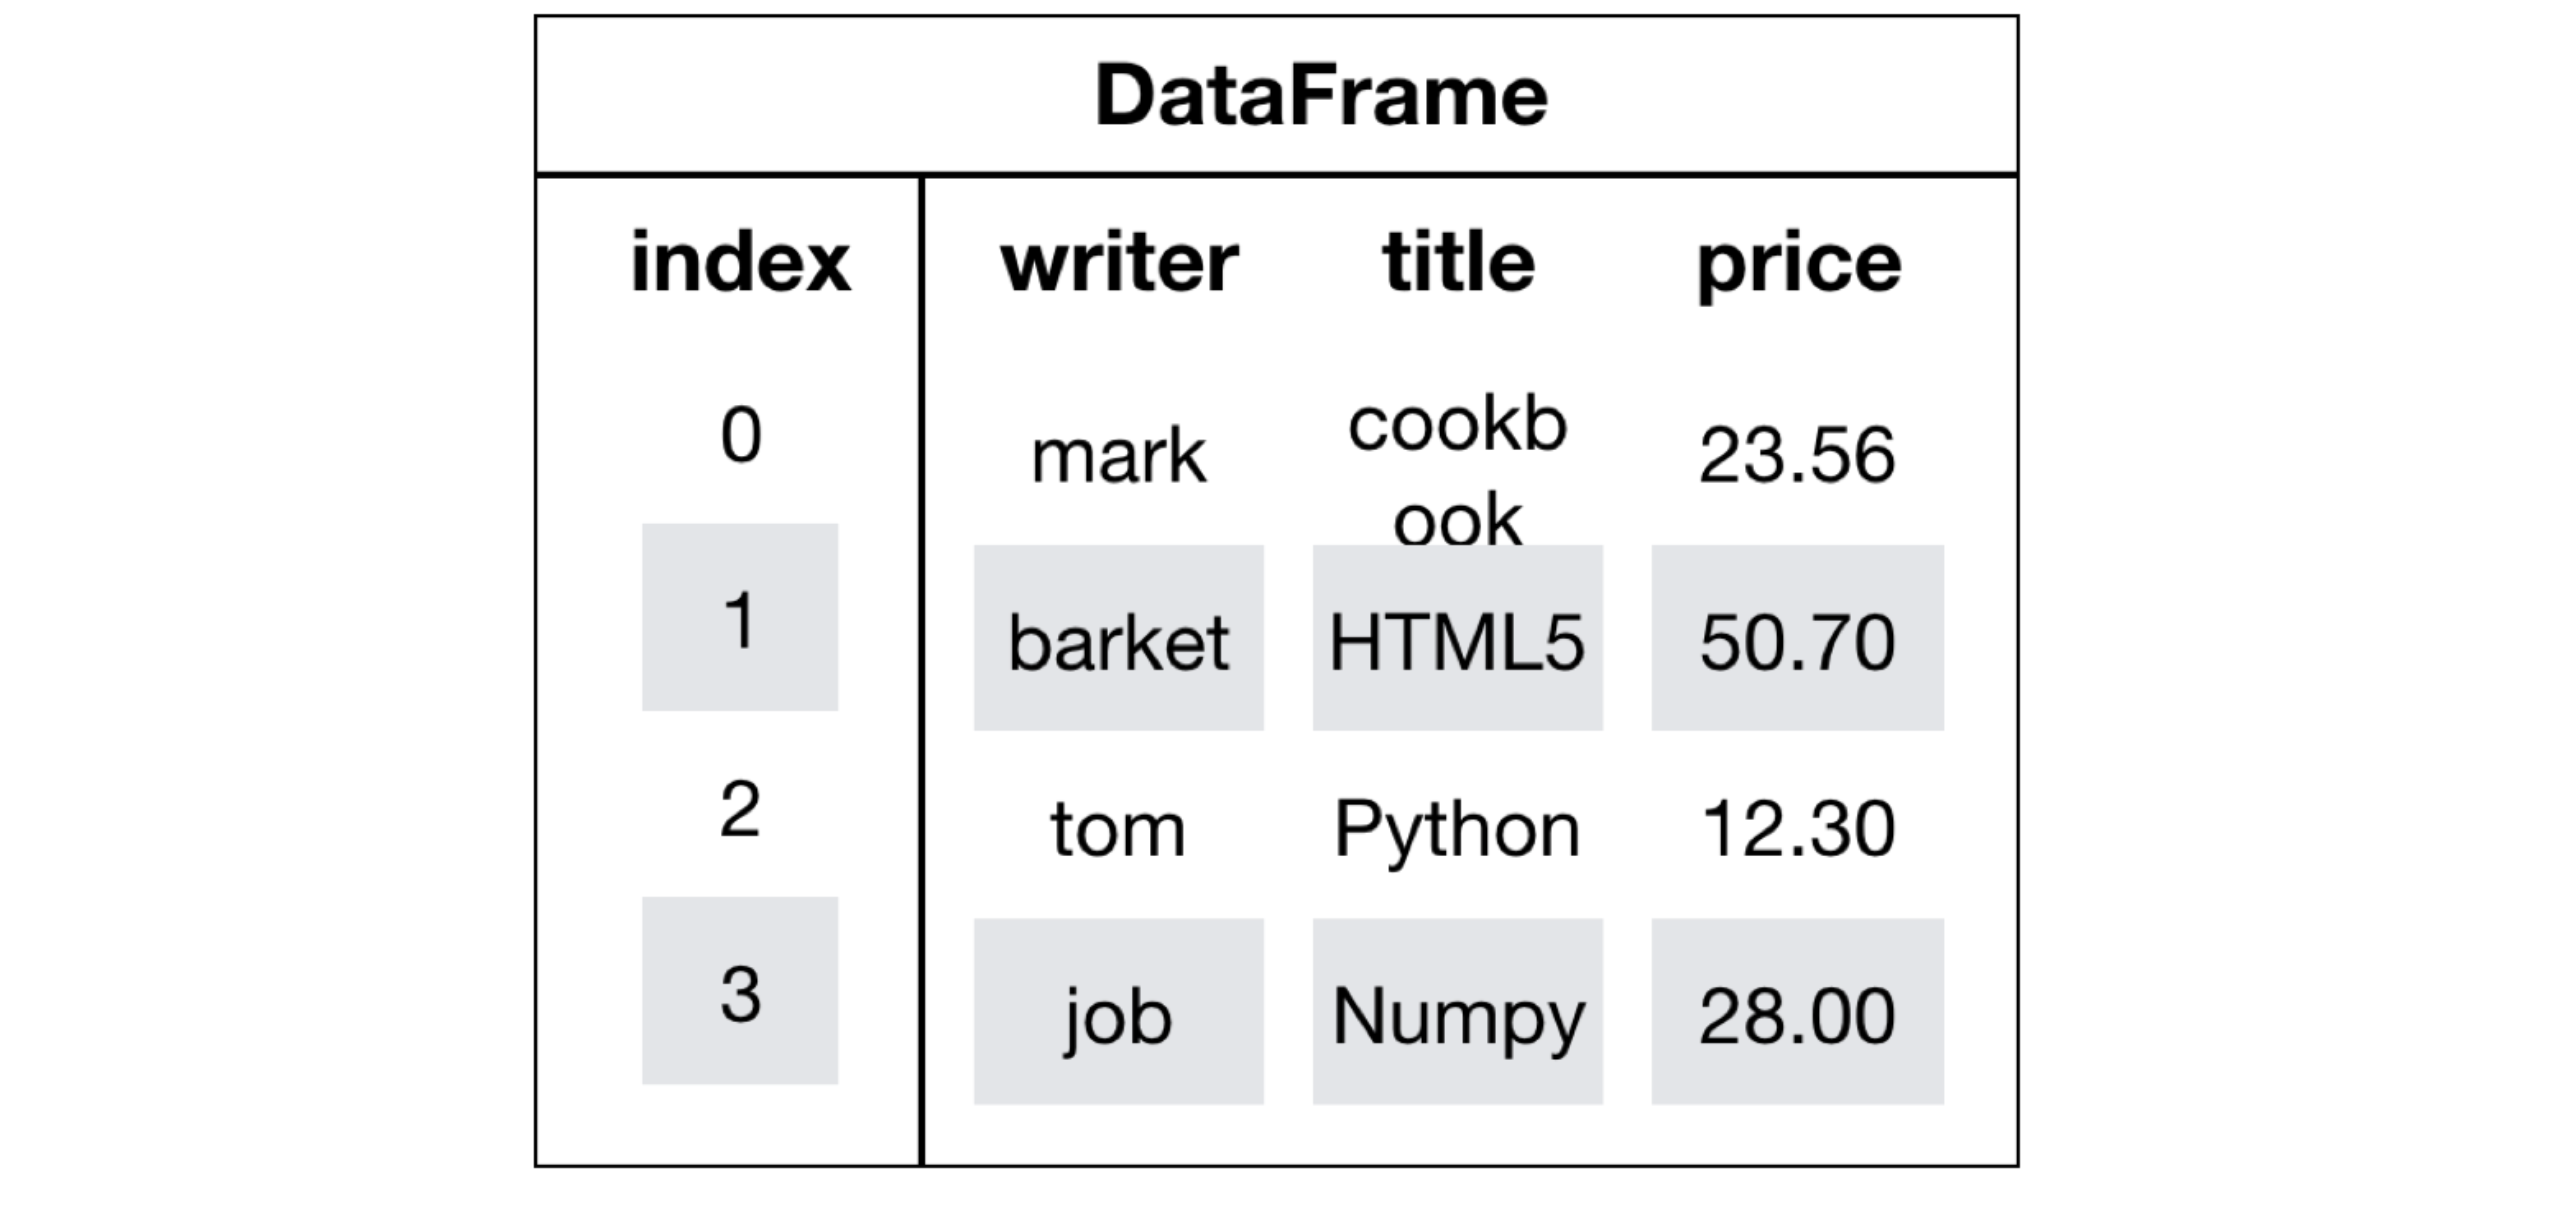
## DataFrame的创建

In [ ]:
# 导入pandas
import pandas as pd

pd.DataFrame(data=None,index=None,columns=None)

- 参数：
    - index：行标签。如果没有传入索引参数，则默认会自动创建一个从0-N的整数索引。
    - columns：列标签。如果没有传入索引参数，则默认会自动创建一个从0-N的整数索引。
- 通过已有数据创建

举例一：

In [11]:
import pandas as pd

#randn函数返回一个或一组样本，具有标准正态分布
pd.DataFrame(np.random.randn(2,3)) 

,0,1,2
0,2.756804,1.387174,0.357229
1,0.010542,-0.193400,-0.150170


**比较直接用np创建数组的区别**

In [12]:
# 生成10名同学，5门功课的数据
score = np.random.randint(40,100,(10,5))
score

array([[92, 66, 51, 85, 80],
       [92, 66, 50, 86, 74],
       [83, 85, 68, 40, 65],
       [69, 71, 79, 86, 55],
       [69, 62, 59, 93, 89],
       [55, 73, 76, 81, 82],
       [72, 73, 88, 91, 82],
       [93, 81, 56, 84, 60],
       [64, 57, 64, 50, 66],
       [54, 99, 41, 68, 79]])

**但是这样的数据形式很难看到存储的是什么的样的数据，可读性比较差！！**

**问题：如何让数据更有意义的显示？**

In [13]:
# 使用Pandas中的数据结构
score_df = pd.DataFrame(score)
score_df

,0,1,2,3,4
0,92,66,51,85,80
1,92,66,50,86,74
2,83,85,68,40,65
3,69,71,79,86,55
4,69,62,59,93,89
5,55,73,76,81,82
6,72,73,88,91,82
7,93,81,56,84,60
8,64,57,64,50,66
9,54,99,41,68,79


给分数数据**增加行列索引**,显示效果更佳

In [14]:
# 构造列索引序列 相当于加列标题
subjects = ["语文", "数学", "英语", "政治", "体育"]

# 构造列索引序列 相当于加行标题
stu = ['同学' + str(i) for i in range(score_df.shape[0])]

# 添加行列索引
data = pd.DataFrame(score, columns=subjects, index=stu)

data

,语文,数学,英语,政治,体育
同学0,92,66,51,85,80
同学1,92,66,50,86,74
同学2,83,85,68,40,65
同学3,69,71,79,86,55
同学4,69,62,59,93,89
同学5,55,73,76,81,82
同学6,72,73,88,91,82
同学7,93,81,56,84,60
同学8,64,57,64,50,66
同学9,54,99,41,68,79


## DataFrame的属性
- **shape**

In [15]:
data.shape

(10, 5)

- **index**：DataFrame的行索引列表

In [16]:
data.index

Index(['同学0', '同学1', '同学2', '同学3', '同学4', '同学5', '同学6', '同学7', '同学8', '同学9'], dtype='object')

- **columns**：DataFrame的列索引列表

In [17]:
data.columns

Index(['语文', '数学', '英语', '政治', '体育'], dtype='object')

- **values**：直接获取其中array的值

In [19]:
data.values

array([[92, 66, 51, 85, 80],
       [92, 66, 50, 86, 74],
       [83, 85, 68, 40, 65],
       [69, 71, 79, 86, 55],
       [69, 62, 59, 93, 89],
       [55, 73, 76, 81, 82],
       [72, 73, 88, 91, 82],
       [93, 81, 56, 84, 60],
       [64, 57, 64, 50, 66],
       [54, 99, 41, 68, 79]])

- **T**：转置

In [20]:
data.T

,同学0,同学1,同学2,同学3,同学4,同学5,同学6,同学7,同学8,同学9
语文,92,92,83,69,69,55,72,93,64,54
数学,66,66,85,71,62,73,73,81,57,99
英语,51,50,68,79,59,76,88,56,64,41
政治,85,86,40,86,93,81,91,84,50,68
体育,80,74,65,55,89,82,82,60,66,79


- **head(5)**:显示前5行内容

如果不补充参数，默认5行。填入参数N则显示前N行

In [21]:
data.head(5)

,语文,数学,英语,政治,体育
同学0,92,66,51,85,80
同学1,92,66,50,86,74
同学2,83,85,68,40,65
同学3,69,71,79,86,55
同学4,69,62,59,93,89


- tail(5):显示后5行内容

如果不补充参数，默认5行。填入参数N则显示后N行

In [23]:
data.tail()

,语文,数学,英语,政治,体育
同学5,55,73,76,81,82
同学6,72,73,88,91,82
同学7,93,81,56,84,60
同学8,64,57,64,50,66
同学9,54,99,41,68,79


## DatatFrame索引的设置

需求：
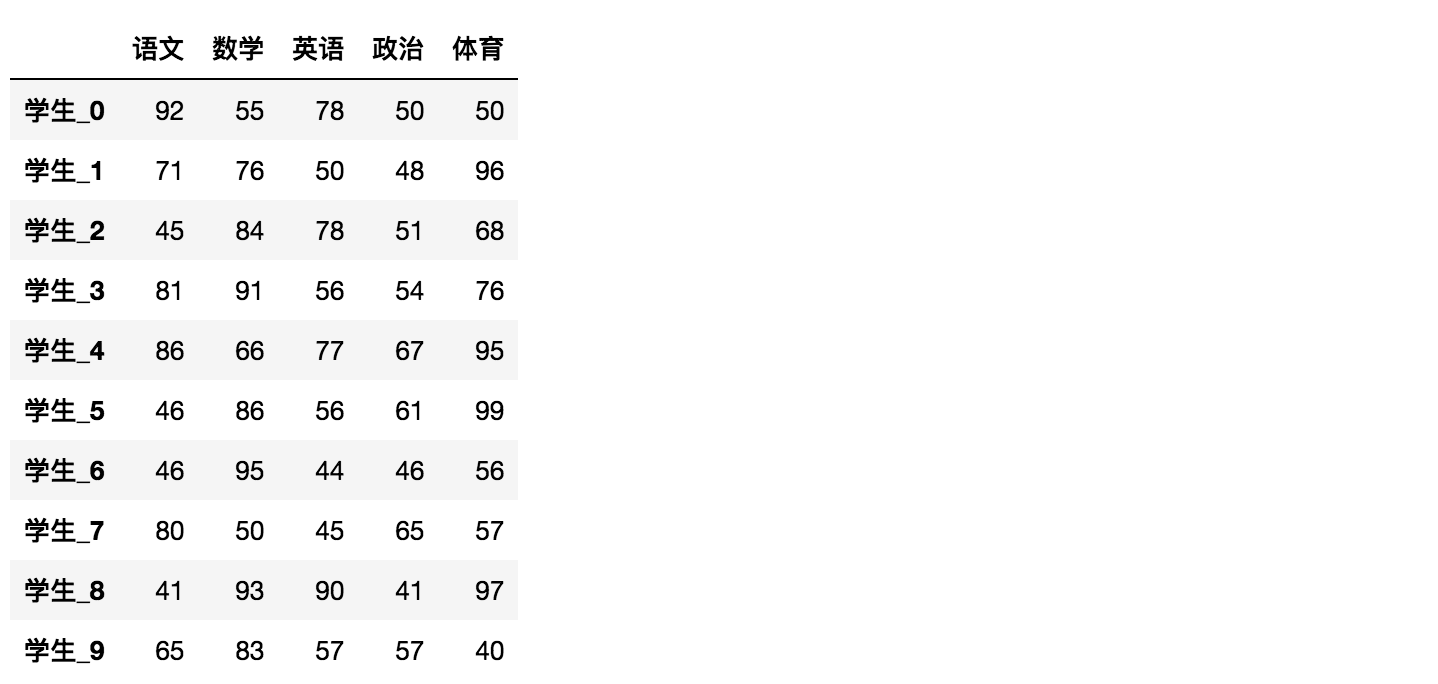

### 修改行列索引值

In [28]:
stu = ["学生_"+str(i) for i in range(score_df.shape[0])]

# 必须整体全部修改
data.index = stu
data

,语文,数学,英语,政治,体育
学生_0,92,66,51,85,80
学生_1,92,66,50,86,74
学生_2,83,85,68,40,65
学生_3,69,71,79,86,55
学生_4,69,62,59,93,89
学生_5,55,73,76,81,82
学生_6,72,73,88,91,82
学生_7,93,81,56,84,60
学生_8,64,57,64,50,66
学生_9,54,99,41,68,79


In [25]:
# 错误修改方式
data.index[3] = '学生_3'

TypeError: Index does not support mutable operations

### 重设索引

- reset_index(drop=False)
    - 设置新的下标索引
    - drop:默认为False，不删除原来索引，如果为True,删除原来的索引值

In [26]:
# 重置索引，drop=False
data.reset_index()

,index,语文,数学,英语,政治,体育
0,学生_0,92,66,51,85,80
1,学生_1,92,66,50,86,74
2,学生_2,83,85,68,40,65
3,学生_3,69,71,79,86,55
4,学生_4,69,62,59,93,89
5,学生_5,55,73,76,81,82
6,学生_6,72,73,88,91,82
7,学生_7,93,81,56,84,60
8,学生_8,64,57,64,50,66
9,学生_9,54,99,41,68,79


In [29]:
# 重置索引,drop=True
data.reset_index(drop=True)

,语文,数学,英语,政治,体育
0,92,66,51,85,80
1,92,66,50,86,74
2,83,85,68,40,65
3,69,71,79,86,55
4,69,62,59,93,89
5,55,73,76,81,82
6,72,73,88,91,82
7,93,81,56,84,60
8,64,57,64,50,66
9,54,99,41,68,79


### 以某列值设置为新的索引

- set_index(keys, drop=True)
    - keys : 列索引名成或者列索引名称的列表
    - drop : boolean, default True.当做新的索引，删除原来的列

设置新索引案例

In [30]:
# 1、创建
df = pd.DataFrame({'month':[1,4,7,10],
                   'year':[2012,2014,2013,2014],
                   'sale':[55,40,84,31]})
df

,month,sale,year
0,1,55,2012
1,4,40,2014
2,7,84,2013
3,10,31,2014


In [31]:
# 2、以月份设置新的索引
df.set_index('month')

,sale,year
month,,
1,55,2012
4,40,2014
7,84,2013
10,31,2014


In [32]:
# 3、设置多个索引，以年和月份
df = df.set_index(['year', 'month'])
df
# 注：通过刚才的设置，这样DataFrame就变成了一个具有MultiIndex的DataFrame。

,,sale
year,month,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


# MultiIndex
## MultiIndex
MultiIndex是三维的数据结构;

多级索引（也称层次化索引）是pandas的重要功能，可以在Series、DataFrame对象上拥有2个以及2个以上的索引。 
### multiIndex的特性

打印刚才的df的行索引结果

In [35]:
df.index

MultiIndex(levels=[[2012, 2013, 2014], [1, 4, 7, 10]],
           labels=[[0, 2, 1, 2], [0, 1, 2, 3]],
           names=['year', 'month'])

多级或分层索引对象。

- index属性
    - names:levels的名称
    - levels：每个level的元组值

In [36]:
df.index.names

FrozenList(['year', 'month'])

In [37]:
df.index.levels

FrozenList([[2012, 2013, 2014], [1, 4, 7, 10]])

In [38]:
### multiIndex的创建
arrays = [[1,1,2,2],['red','blue','red','blue']]
pd.MultiIndex.from_arrays(arrays,names=('number','color'))

MultiIndex(levels=[[1, 2], ['blue', 'red']],
           labels=[[0, 0, 1, 1], [1, 0, 1, 0]],
           names=['number', 'color'])

# 小结
- pandas的优势【了解】
    - 增强图表可读性
    - 便捷的数据处理能力
    - 读取文件方便
    - 封装了Matplotlib、Numpy的画图和计算
- series【知道】
    - 创建
        - pd.Series([], index=[])
        - pd.Series({})
    - 属性
        - 对象.index
        - 对象.values
- DataFrame【掌握】
    - 创建
        - pd.DataFrame(data=None, index=None, columns=None)
    - 属性
        - shape -- 形状
        - index -- 行索引
        - columns -- 列索引
        - values -- 查看值
        - T -- 转置
        - head() -- 查看头部内容
        - tail() -- 查看尾部内容
    - DataFrame索引
        - 修改的时候,需要进行全局修改
        - 对象.reset_index()
        - 对象.set_index(keys)
- MultiIndex与Panel【了解】
    - multiIndex:
        - 类似ndarray中的三维数组
        - 创建：
            - pd.MultiIndex.from_arrays()
        - 属性：
            - 对象.index
    - panel：
        - pd.Panel(data, items, major_axis, minor_axis)
        - panel数据要是想看到,则需要进行索引到dataframe或者series才可以
